In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as k
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
(x_train,y_train) , (x_test,y_test) = k.datasets.mnist.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

In [ ]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

In [3]:
model = k.Sequential([
    k.layers.Conv2D(6,5,input_shape = (28,28,1),activation="tanh"),
    k.layers.AveragePooling2D(pool_size=(2,2)),
    k.layers.Conv2D(16,5,activation="tanh"),
    k.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)),
    k.layers.Conv2D(120,4,activation="tanh"),
    k.layers.Flatten(),
    k.layers.Dense(84,activation="tanh"),
    k.layers.Dense(10,activation="softmax")
])

In [ ]:
model.compile(loss=k.losses.categorical_crossentropy,optimizer='sgd',metrics=["accuracy"]) #sgd gives training acc > 99%
hist = model.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test))

In [ ]:
# model.predict(x_test[:3])
test_score = model.evaluate(x_test, y_test)
print ("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Accuracy'], loc = 0)
ax.set_title('Training/Validation Accuracy per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

In [ ]:
## Trying Kaggle Digits with lenet-5 using adam optimizer

In [4]:
data = pd.read_csv('./digits_kaggle/train.csv')
data_test = pd.read_csv('./digits_kaggle/test.csv')

In [5]:
y_train_l = data.iloc[:,0]

In [6]:
x_train_l = data.iloc[:,1:]
x_train_l = x_train_l.astype('float32')
x_train_l = x_train_l/255.0
x_train_l = (x_train_l.values.reshape(data.shape[0],28,28,1))
x_train_l

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [7]:
x_test_l = data_test.iloc[:,:]
x_test_l = x_test_l.astype('float32')
x_test_l = x_test_l/255.0
x_test_l = x_test_l.values.reshape(data_test.shape[0],28,28,1)
x_trains_l,x_tests_l,y_trains_l,y_tests_l = train_test_split(x_train_l,y_train_l,test_size=0.05)

In [8]:
x_trains_l = np.asarray(x_trains_l)
x_tests_l = np.asarray(x_tests_l)
y_trains_l = np.asarray(y_trains_l)
y_tests_l = np.asarray(y_tests_l)

In [9]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [10]:
hist = model.fit(x_trains_l,y_trains_l,batch_size=128,epochs=20,validation_data=(x_tests_l,y_tests_l))

Train on 39900 samples, validate on 2100 samples
Epoch 1/20
39900/39900 [==============================] - 19s 475us/sample - loss: 0.4298 - accuracy: 0.8727 - val_loss: 0.2054 - val_accuracy: 0.9371
Epoch 2/20
39900/39900 [==============================] - 3s 82us/sample - loss: 0.1739 - accuracy: 0.9465 - val_loss: 0.1279 - val_accuracy: 0.9586
Epoch 3/20
39900/39900 [==============================] - 3s 80us/sample - loss: 0.1181 - accuracy: 0.9625 - val_loss: 0.0920 - val_accuracy: 0.9748
Epoch 4/20
39900/39900 [==============================] - 3s 82us/sample - loss: 0.0886 - accuracy: 0.9719 - val_loss: 0.0771 - val_accuracy: 0.9800
Epoch 5/20
39900/39900 [==============================] - 3s 81us/sample - loss: 0.0697 - accuracy: 0.9779 - val_loss: 0.0738 - val_accuracy: 0.9790
Epoch 6/20
39900/39900 [==============================] - 3s 81us/sample - loss: 0.0589 - accuracy: 0.9813 - val_loss: 0.0686 - val_accuracy: 0.9781
Epoch 7/20
39900/39900 [==============================]

In [11]:
test_score = model.evaluate(x_tests_l, y_tests_l)
print ("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

2100/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss 0.0801, accuracy 98.19%


Text(0, 0.5, 'Loss')

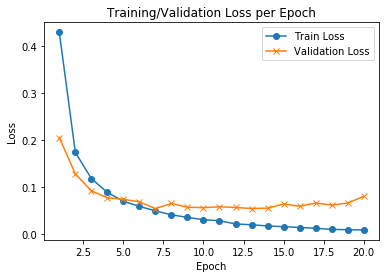

In [12]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

Text(0, 0.5, 'Accuracy')

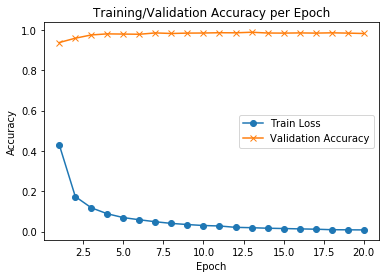

In [13]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Accuracy'], loc = 0)
ax.set_title('Training/Validation Accuracy per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

In [14]:
pred = model.predict(x_test_l,verbose=1)
pred.shape

28000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

(28000, 10)

In [15]:
pred.round()

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [16]:
predictions = tf.argmax(pred,axis=1)
output = pd.DataFrame(predictions,columns={'Label'})
output['ImageId'] = output.index+1
output = output[['ImageId','Label']]
output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [17]:
output.to_csv('kaggle_digits_submission.csv')

In [32]:
from keras.applications import VGG19
model = VGG19(include_top=False,weights='imagenet',input_tensor=None,
                            pooling='max',classes=10)

ValueError: Unexpectedly found an instance of type `<class 'numpy.ndarray'>`. Expected a symbolic tensor instance.